In [91]:
import json
import pandas as pd
import altair as alt
from datetime import datetime, timedelta

In [92]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [93]:
df = pd.read_csv("./_data/sales.csv")

In [94]:
df.date = pd.to_datetime(df.date)

In [95]:
def percentage_change(old_value, new_value, multiply=True, fail_silently=True):
    """
    Accepts two integers, an old and a new number,
    and then measures the percent change between them.
    The change between the two numbers is determined
    and then divided into the original figure.
    By default, it is then multiplied by 100, and
    returning as a float.
    If you don't want the number multiplied by 100,
    set the 'multiply' kwarg to False.
    If you divide into zero -- an illegal operation -- a null value
    is returned by default. If you prefer for an error to be raised,
    set the kwarg 'fail_silently' to False.
    h3. Example usage
        >> import calculate
        >> calculate.percentage_change(2, 10)
        400.0
    h3. Documentation
        * "percentage_change":http://en.wikipedia.org/wiki/Percentage_change
    """
    change = new_value - old_value
    try:
        percentage_change = (change / float(old_value))
        if multiply:
            percentage_change = percentage_change * 100
        return percentage_change
    except ZeroDivisionError:
        # If there's a zero involved return null if set to fail silent
        if fail_silently:
            return None
        # but otherwise shout it all out
        else:
            raise ZeroDivisionError("Sorry. You can't divide into zero.")

## Promenade West

In [96]:
pwest = df[df.building_name == 'Promenade West']
pwest.to_csv("./_data/pwest_sales.csv", index=False)

In [97]:
def year_over_year_comparison(df):
    this_year = df[df.year == datetime.now().year]
    last_year = df[df.year == datetime.now().year - 1]
    stats = {
        'this_year': {
            'count': len(this_year),
            'median_price': this_year.price.median(),
            'median_price_per_sqft': this_year.price_per_square_foot.median(),
        },
        'last_year': {
            'count': len(last_year),
            'median_price': last_year.price.median(),
            'median_price_per_sqft': last_year.price_per_square_foot.median(),
        },
        'all_time': {
            'median_sqft': df.square_feet.median()
        }
    }
    stats.update({
        'change': {
            'price': percentage_change(stats['last_year']['median_price'], stats['this_year']['median_price']), 
            'median_price_per_sqft': percentage_change(stats['last_year']['median_price_per_sqft'], stats['this_year']['median_price_per_sqft']), 
        }
    })
    return stats

In [98]:
json.dump(year_over_year_comparison(pwest), open("./_data/pwest.json", "w"), indent=4)

### Most recent sales

In [99]:
pwest.sort_values("date", ascending=False)[[
    'building_name',
    'date',
    'unit',
    'price',
    'square_feet',
    'price_per_square_foot'
]].head(5)

,building_name,date,unit,price,square_feet,price_per_square_foot
2014,Promenade West,2018-07-03,308,620000.0,1323.0,468.631897
2015,Promenade West,2018-06-12,527,600000.0,1323.0,453.514739
2016,Promenade West,2018-04-11,706,598000.0,1348.0,443.620178
2017,Promenade West,2018-02-01,409,590000.0,1323.0,445.956160
2018,Promenade West,2018-01-24,315,615000.0,1509.0,407.554672


### The pace of sales

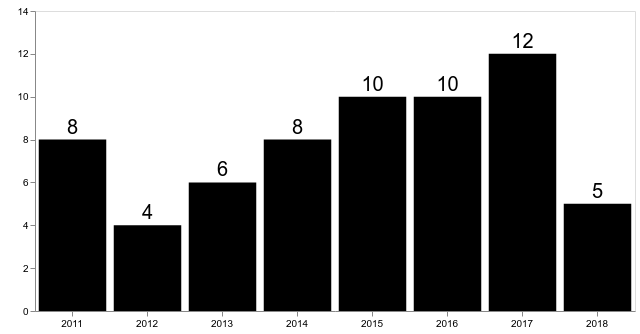

In [100]:
bars = alt.Chart(pwest).mark_bar(color="black").encode(
    x=alt.X("date:O", timeUnit="year", axis=alt.Axis(labelAngle=0, title="")),
    y=alt.Y("count()", scale=alt.Scale(domain=(0, 14)), axis=alt.Axis(title="", grid=False))
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-12,
    size=20
).encode(
    text='count()'
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/sales-by-year.svg')

chart

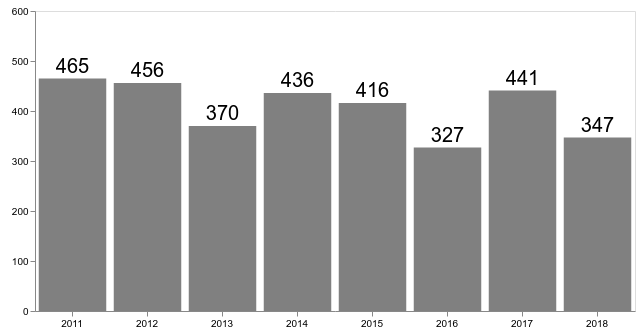

In [101]:
bars = alt.Chart(df).mark_bar(color="gray").encode(
    x=alt.X("date:O", timeUnit="year", axis=alt.Axis(labelAngle=0, title="")),
    y=alt.Y("count()", scale=alt.Scale(domain=(0, 600)), axis=alt.Axis(title="", grid=False))
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-12,
    size=20
).encode(
    text='count()'
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/dtla-sales-by-year.svg')

chart

### Prices by date

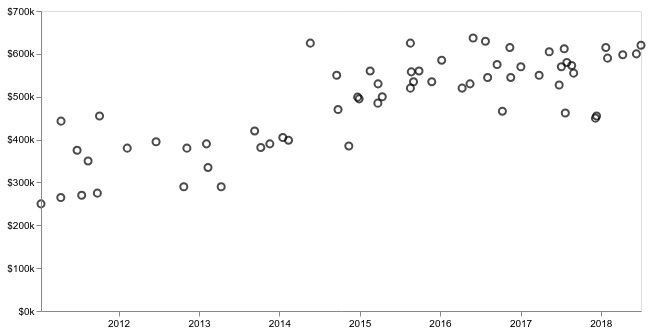

In [102]:
chart = alt.Chart(pwest).mark_point(size=50, color="black").encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000])
    ),
    tooltip=["unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

chart.configure_view(
    strokeOpacity=0
).save('assets/price-by-date.svg')

chart

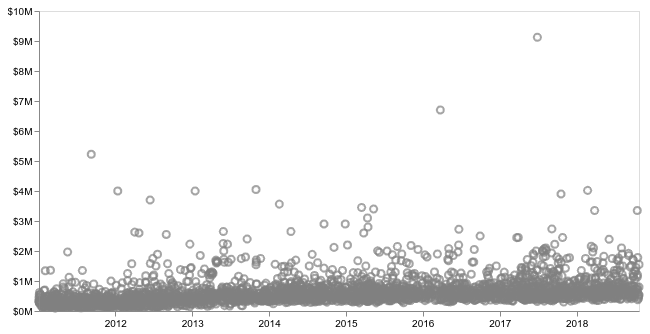

In [103]:
chart = alt.Chart(df).mark_point(size=50, color="gray").encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 10000000])
    ),
    tooltip=["unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

chart.configure_view(
    strokeOpacity=0
).save('assets/dtla-price-by-date.svg')

chart

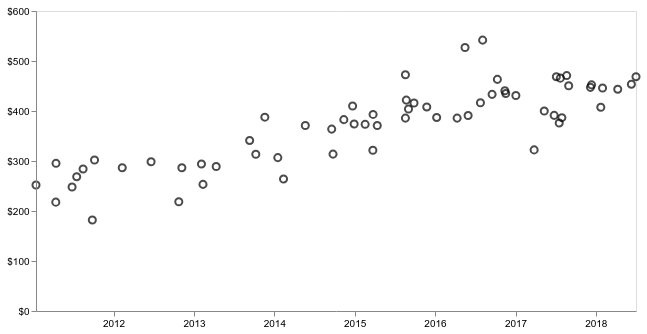

In [104]:
chart = alt.Chart(pwest).mark_point(size=50, color="black").encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 600])
    ),
    tooltip=["unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

chart.configure_view(
    strokeOpacity=0
).save('assets/price-per-sqft-by-date.svg')

chart

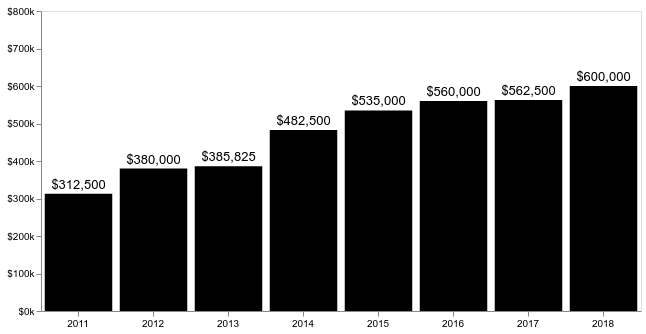

In [105]:
bars = alt.Chart(pwest).mark_bar(color="black").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 750000]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/price-by-year.svg')

chart

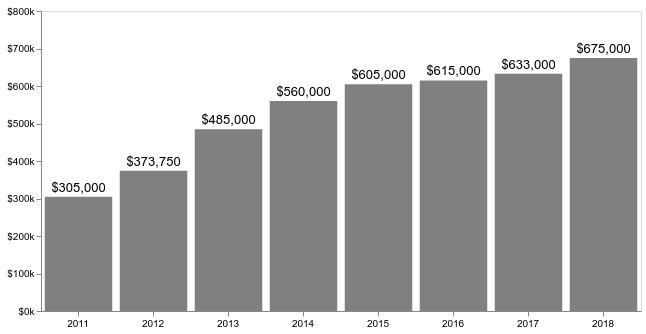

In [106]:
bars = alt.Chart(df).mark_bar(color="gray").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 750000]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/dtla-price-by-year.svg')

chart

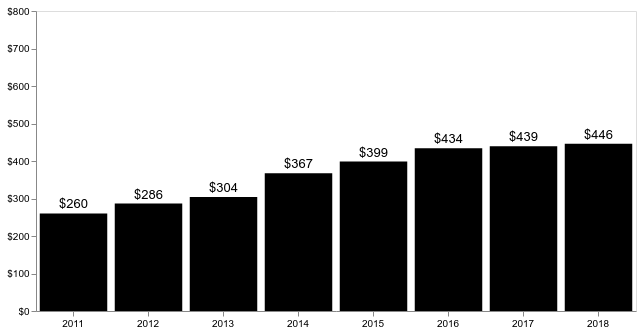

In [107]:
bars = alt.Chart(pwest).mark_bar(color="black").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 750]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price_per_square_foot):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/price-per-sqft-by-year.svg')

chart

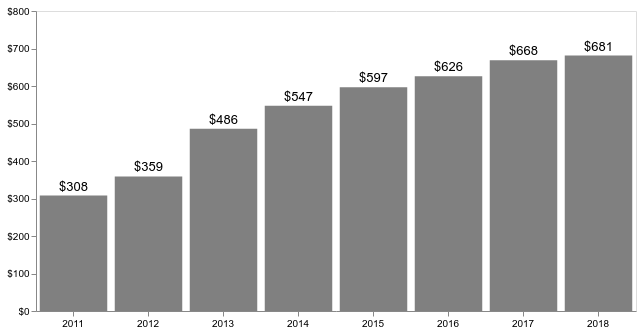

In [108]:
bars = alt.Chart(df).mark_bar(color="gray").encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 750]),
    ),
).properties(width=600)

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-9,
    size=13
).encode(
    text=alt.Text('median(price_per_square_foot):Q', format="$,.0f")
)

chart = bars + text

chart.configure_view(
    strokeOpacity=0
).save('assets/dtla-price-per-sqft-by-year.svg')

chart

## Bunker Hill

In [109]:
bunker_hill = df[df.region == 'Bunker Hill']

In [110]:
json.dump(year_over_year_comparison(bunker_hill), open("./_data/bunkerhill.json", "w"), indent=4)

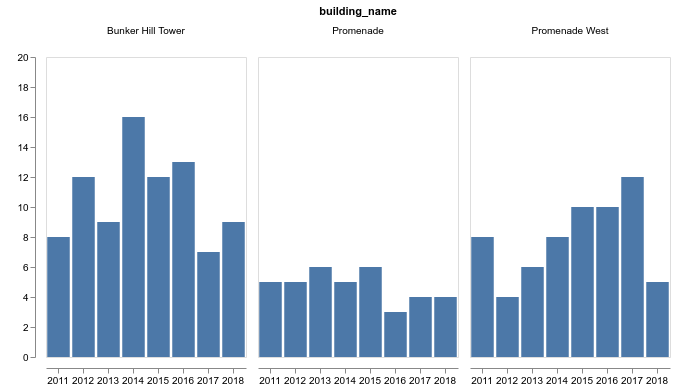

In [111]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X("date:O", timeUnit="year", axis=alt.Axis(labelAngle=0, title="")),
    y=alt.Y("count()", scale=alt.Scale(domain=(0, 20)), axis=alt.Axis(title="", grid=False)),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/sales-by-year.svg')

chart

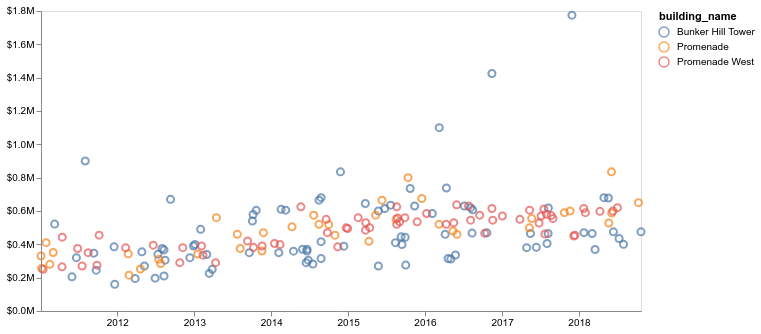

In [112]:
chart = alt.Chart(bunker_hill).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="building_name",
    tooltip=["building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-date.svg')

chart

In [113]:
bunker_hill.head()

,bathrooms,bedrooms,building_name,building_number,date,price,region,square_feet,unit,url,price_per_square_foot,year
600,1.0,1.0,Bunker Hill Tower,14,2018-10-23,475000.0,Bunker Hill,735.0,1906,https://www.dlxco.com/the-promenade-west-lofts...,646.258503,2018
601,1.0,0.0,Bunker Hill Tower,14,2018-08-01,400000.0,Bunker Hill,481.0,1409,https://www.dlxco.com/the-promenade-west-lofts...,831.600832,2018
602,1.0,0.0,Bunker Hill Tower,14,2018-07-11,435000.0,Bunker Hill,481.0,1304,https://www.dlxco.com/the-promenade-west-lofts...,904.365904,2018
603,1.0,1.0,Bunker Hill Tower,14,2018-06-14,475000.0,Bunker Hill,762.0,1702,https://www.dlxco.com/the-promenade-west-lofts...,623.359580,2018
604,2.0,2.0,Bunker Hill Tower,14,2018-05-21,678000.0,Bunker Hill,1234.0,1610,https://www.dlxco.com/the-promenade-west-lofts...,549.432739,2018


In [114]:
# pd.merge(
#     bunker_hill.groupby(["building_name", 'year']).price.median().reset_index(),
#     bunker_hill.groupby(["building_name", 'year']).price_per_square_foot.median().reset_index()
# ).pivot(index="year")

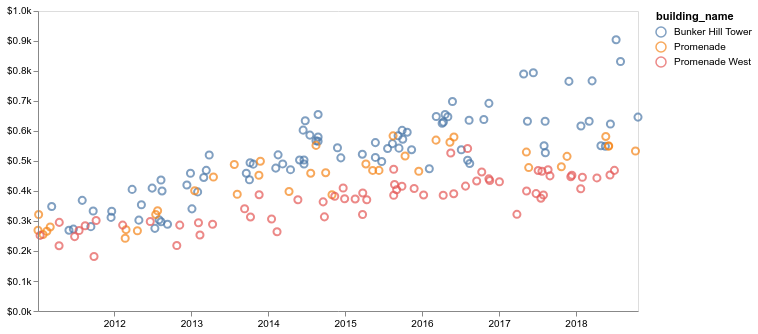

In [115]:
chart = alt.Chart(bunker_hill).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False)
    ),
    color="building_name:N",
    tooltip=["building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-per-sqft-by-date.svg')

chart

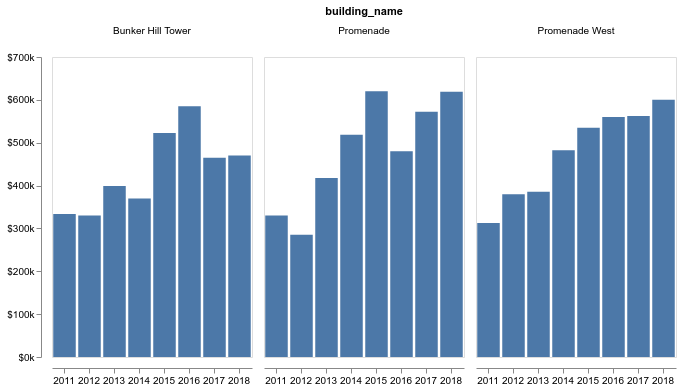

In [116]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
        scale=alt.Scale(domain=[0, 700000]),
    ),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

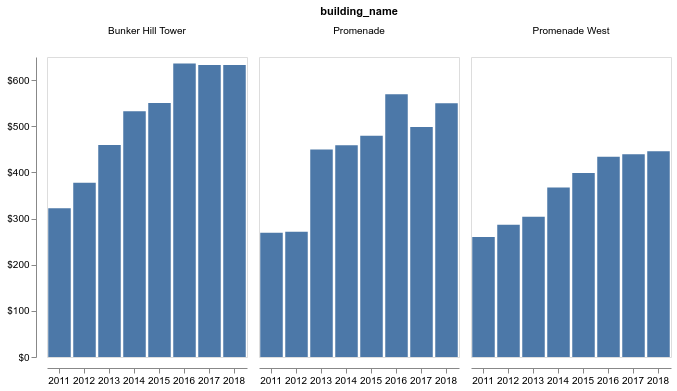

In [117]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

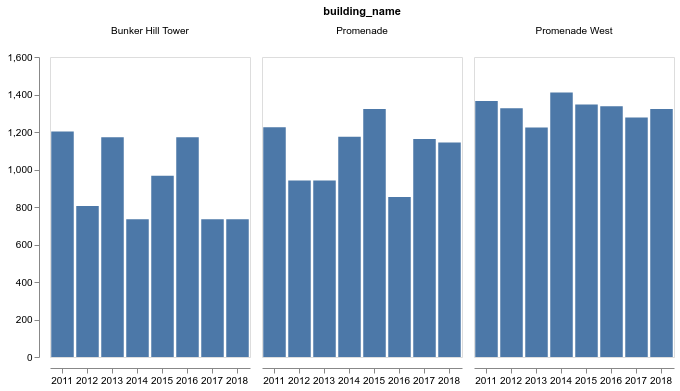

In [118]:
chart = alt.Chart(bunker_hill).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(square_feet):Q",
        axis=alt.Axis(title="", grid=False),
    ),
    column="building_name:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

## Region

In [119]:
json.dump(year_over_year_comparison(df), open("./_data/dtla.json", "w"), indent=4)

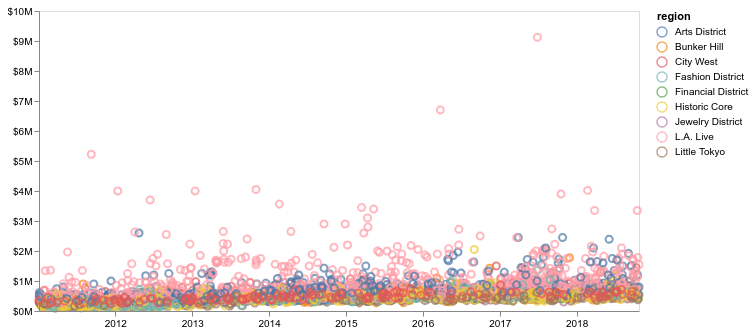

In [120]:
chart = alt.Chart(df).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="region",
    tooltip=["region", "building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-date.svg')

chart

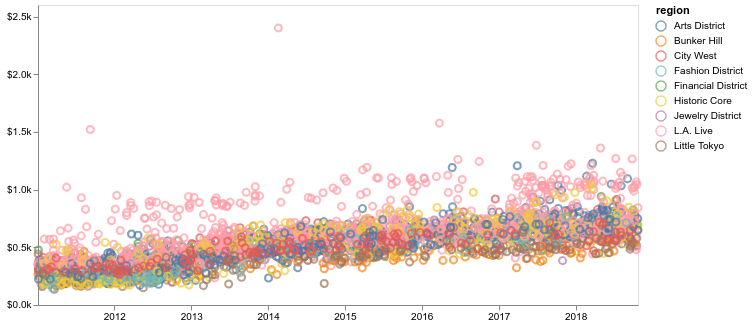

In [121]:
chart = alt.Chart(df).mark_point(size=50).encode(
    x=alt.X(
        "date:T",
        axis=alt.Axis(title="", format="%Y", tickCount=7, grid=False),
    ),
    y=alt.Y(
        "price_per_square_foot:Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="region",
    tooltip=["region", "building_name", "unit", "price", "square_feet", "price_per_square_foot"]
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-date.svg')

chart

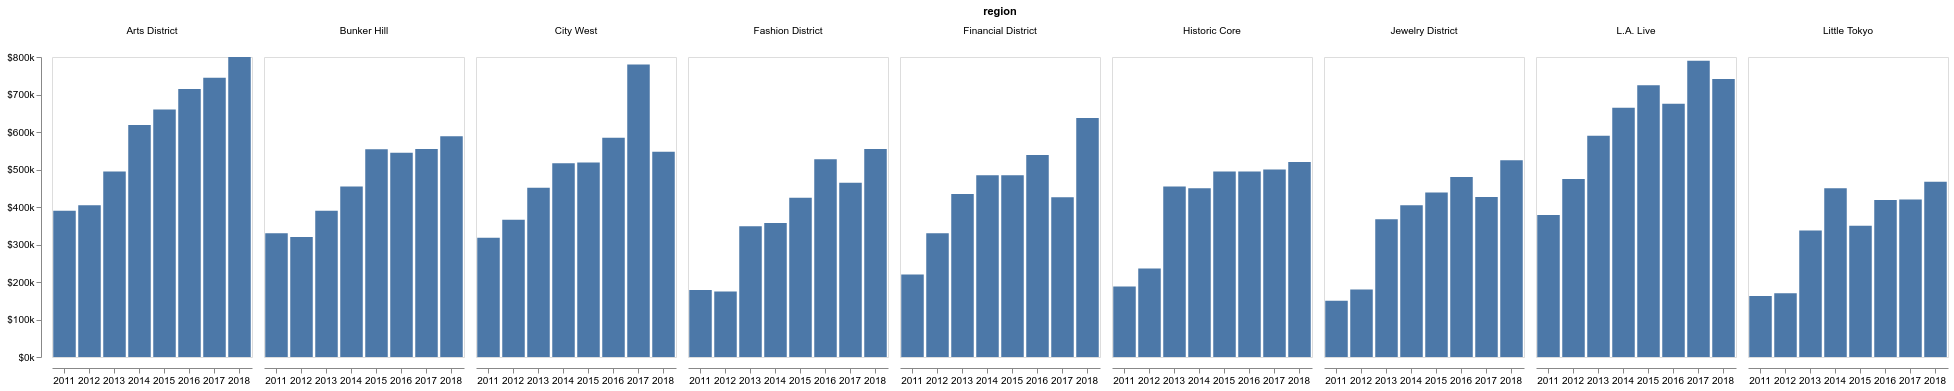

In [122]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    column="region:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

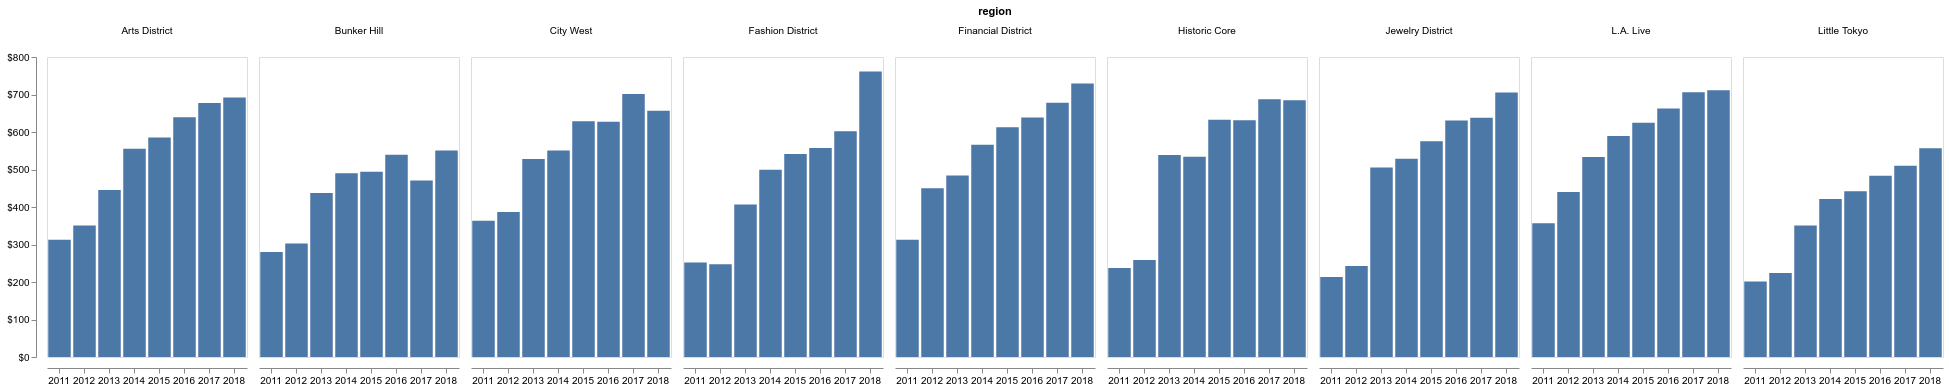

In [123]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X(
        "date:O",
        timeUnit="year",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price_per_square_foot):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    column="region:N"
).properties(width=200)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

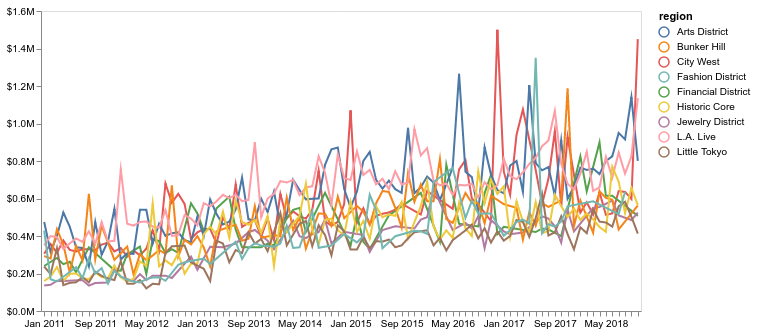

In [124]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X(
        "date:O",
        timeUnit="yearmonth",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
    color="region:N"
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

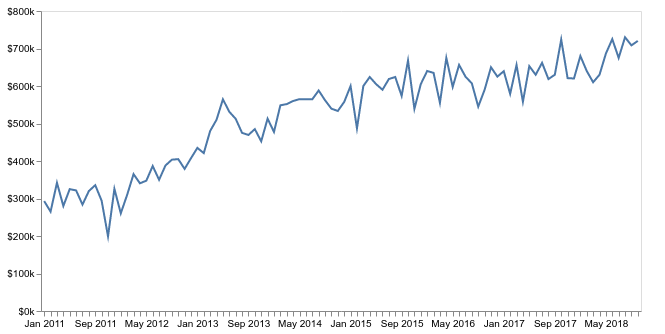

In [125]:
chart = alt.Chart(df).mark_line().encode(
    x=alt.X(
        "date:O",
        timeUnit="yearmonth",
        axis=alt.Axis(title="", labelAngle=0),
    ),
    y=alt.Y(
        "median(price):Q",
        axis=alt.Axis(title="", format="$s", grid=False),
    ),
).properties(width=600)

# chart.configure_view(
#     strokeOpacity=0
# ).save('assets/price-by-year.svg')

chart

## Rankings

In [126]:
building_ranking = df.groupby(["building_name", "region"]).agg({
    "unit": "count",
    "price": "median",
    "price_per_square_foot": "median",
    "square_feet": "median",
})

In [127]:
building_ranking.sort_values("price_per_square_foot", ascending=False)

,,price,square_feet,unit,price_per_square_foot
building_name,region,,,,
Metropolis Tower II,L.A. Live,1162000.0,918.0,3,1265.795207
Metropolis Tower I,L.A. Live,973000.0,977.0,18,1098.527822
Ritz Carlton,L.A. Live,1760000.0,1833.5,104,988.327314
Ten50,L.A. Live,998000.0,1084.0,55,927.374302
The Rowan,Historic Core,510000.0,820.0,99,675.694444
Luma Lofts,L.A. Live,625000.0,990.0,157,656.481481
Concerto Lofts,L.A. Live,635000.0,997.5,22,636.906918
Douglas,Historic Core,465500.0,950.0,32,630.249480
Biscuit Company Lofts,Arts District,732500.0,1112.0,64,629.258309


In [128]:
region_ranking = df.groupby(["region"]).agg({
    "unit": "count",
    "price": "median",
    "price_per_square_foot": "median",
    "square_feet": "median",
})

In [129]:
region_ranking.sort_values("price_per_square_foot", ascending=False)

,price,square_feet,unit,price_per_square_foot
region,,,,
L.A. Live,648000.0,1170.0,1165,611.650485
Financial District,415000.0,740.0,105,556.338028
City West,500000.0,960.0,259,547.222222
Historic Core,425000.0,820.0,366,542.838565
Arts District,586500.0,1174.0,688,526.794335
Jewelry District,402000.0,740.0,94,526.647727
Bunker Hill,466000.0,1172.0,187,453.514739
Fashion District,357000.0,795.0,148,451.153324
Little Tokyo,365000.0,858.0,246,432.544228


## Last 12 months

In [130]:
one_year_ago = datetime.now() - timedelta(days=365)

In [131]:
last_year = df[df.date > one_year_ago]

In [132]:
last_year.groupby(["building_name", "region"]).agg({
    "unit": "count",
    "price": "median",
    "price_per_square_foot": "median",
    "square_feet": "median",
}).sort_values("price_per_square_foot", ascending=False)

,,price,square_feet,unit,price_per_square_foot
building_name,region,,,,
Metropolis Tower II,L.A. Live,1162000.0,918.0,3,1265.795207
Metropolis Tower I,L.A. Live,723500.0,657.0,8,1132.925149
Ritz Carlton,L.A. Live,1750000.0,1686.0,15,1061.138440
Ten50,L.A. Live,1074500.0,1114.0,18,967.722729
Biscuit Company Lofts,Arts District,850000.0,1052.0,11,851.851852
The Rowan,Historic Core,610000.0,720.0,11,847.222222
Gallery Lofts,Arts District,743000.0,901.0,4,819.232250
Barker Block Warehouse,Arts District,787500.0,991.0,4,794.419064
Eastern Columbia,L.A. Live,1192500.0,1675.0,8,783.776045


In [133]:
df.groupby(["region"]).agg({
    "unit": "count",
    "price": "median",
    "price_per_square_foot": "median",
    "square_feet": "median",
}).sort_values("price_per_square_foot", ascending=False)

,price,square_feet,unit,price_per_square_foot
region,,,,
L.A. Live,648000.0,1170.0,1165,611.650485
Financial District,415000.0,740.0,105,556.338028
City West,500000.0,960.0,259,547.222222
Historic Core,425000.0,820.0,366,542.838565
Arts District,586500.0,1174.0,688,526.794335
Jewelry District,402000.0,740.0,94,526.647727
Bunker Hill,466000.0,1172.0,187,453.514739
Fashion District,357000.0,795.0,148,451.153324
Little Tokyo,365000.0,858.0,246,432.544228


## Largest units

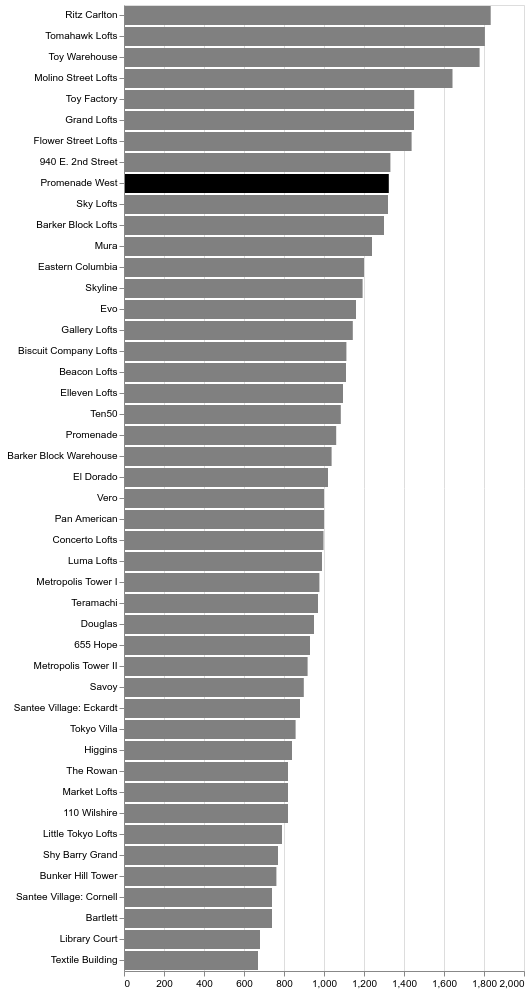

In [134]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X(
        "median(square_feet):Q",
        axis=alt.Axis(title="")
    ),
    y=alt.Y(
        "building_name:N",
        axis=alt.Axis(title=""),
        sort=alt.SortField(field="square_feet", op="median", order="descending")
    ),
    color=alt.condition(
        alt.datum.building_name == 'Promenade West',
        alt.value("black"),
        alt.value("gray")
    )
)

chart.configure_view(
    strokeOpacity=0
).save('assets/size-by-building.svg')

chart